# init

In [1]:
import sys 
sys.path.append('pyfiles/')
import classes_loop as cl
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance
from scipy.stats import qmc
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# # sliders
# from ipywidgets import interactive

# # for matrix import and display
# import pandas as pd
# from IPython.display import display_html 
import csv 

# # to time things
# import time
# for removing punctuation from str
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

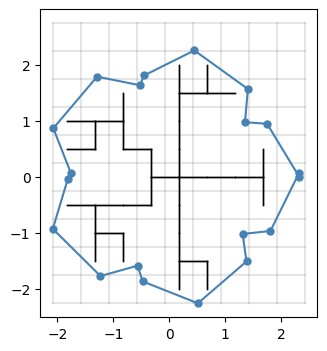

approx length of med ax:  17.5


In [2]:
############################
# CONTROL PARAMETERS # 
############################

name = 'rose'
n = 20
# NOTE: eps has different meaning for use_distknee and not
# higher is more pruned in both
e = 1
# 0.8 is default
g = .5
# these shift the grid over
x_shift = 0
y_shift = 0
pts = cl.hypotrochoid_example(numpts = n, display = False)

medaxdim = 0
# true means we use comparison of distance and eps is multiplier
# false means we use eps-nearest neighbor
use_dist = True

gridon = False
makevor = False

#############################
# ISSUE: distance in use_dist is euclidean, not geodesic
# lower left corner
poisson_intensity = None
radius = None
textboxcoords = [.5, .55]

filename = cl.generate_filename(n, e, g, x_shift, 
                                y_shift, name, medaxdim, use_dist, 
                                poisson_intensity, radius)
# testpoint tests a manually entered grid point and 
# spits out the info about it for debugging, but only if testpoint is True
# make medial axis
cl.make_medial_axis(numpts = n, epsilon = e, grid_density = g, 
                    inputpts = pts, design = name, axis = medaxdim, drawgrid = gridon,
                    savefig = True, figsavename = filename,
                    x_bump = x_shift, y_bump = y_shift, plotpoints = False, 
                    textboxcoords = textboxcoords, textboxon = False,
                    testpointinfo = (2, -0.5), testpoint = False,
                    use_distknee = use_dist)

# NOTE: newest addition, usedistknee, still needs to be tested to make sure it's right
# use with caution
# make voronoi
if makevor:
    vor = Voronoi(pts)
    fig, ax = plt.subplots()
    # plot voronoi stuff
    ax.set_aspect('equal')
    fig2 = voronoi_plot_2d(vor, ax, show_vertices=True, 
                    line_alpha = 1, show_points = True, 
                    point_colors='orange', point_size=10);
    plt.savefig('../shapes_medax/' + filename +'v.png', dpi = 300)

## knee is along del edge; plot vor

0.22360679774997896 5 (15, 2)


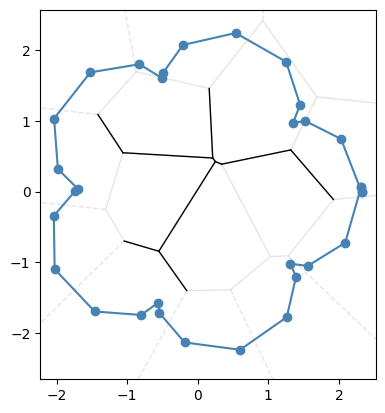

length of med ax:  7.689532978778999


In [3]:
# control parameters 
# note to self: we control poisson seed for reproducability.
# it could also be a param here, or released to go randomly.
name = 'rose'
n = 30
epsilon = 1
inputt = cl.hypotrochoid_example(numpts = n, display = False);
poisson_intensity = 5
axisdim = 0
printinfo = False
use_dist_based_alg = True

####
radius = 1/(2*(math.sqrt(poisson_intensity)))
e = None
g = None
x_shift = None
y_shift = None
filename = cl.generate_filename(n, e, g, x_shift, 
                                y_shift, name, medaxdim, use_dist, 
                                poisson_intensity, radius)

cl.make_poisson_vor_med_ax(inputt, n, epsilon, 
                        poisson_intensity, radius, axisdim,
                        figsavename = filename, 
                        use_dist_based_alg = True, 
                        printinfo = False,textboxon = False)

## knee is along vor edge; plot del

0.22360679774997896 5 (13, 2)
progress: 12 out of 12 | total time elapsed: 0.38 sec
length of med ax approx 8.73584300866176


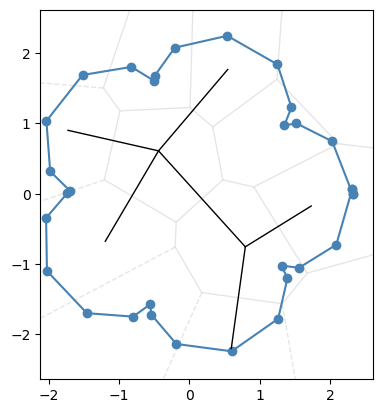

In [94]:
# control parameters 
# note to self: we control poisson seed for reproducability.
# it could also be a param here, or released to go randomly.
n = 30
epsilon = 1
inputt = cl.hypotrochoid_example(numpts = n, display = False);
poisson_intensity = 5
axisdim = 0
printinfo = False
use_dist_based_alg = True

####
radius = 1/(2*(math.sqrt(poisson_intensity)))
e = None
g = None
x_shift = None
y_shift = None
filename = cl.generate_filename(n, e, g, x_shift, 
                                y_shift, name, medaxdim, use_dist, 
                                poisson_intensity, radius)

cl.make_poisson_del_med_ax(inputt, n, epsilon, 
                        poisson_intensity,radius, axisdim,
                        figsavename = filename,
                        use_dist_based_alg = True, 
                        printinfo = False,textboxon = False)

## Grid based
    - size of grid
    - alignment of grid
    - density of shape sampling
    - pruning: nearest nb or distance
    - note: the grid edges are vor edges of grid
## Poisson based
    - density of sampling
    - density of shape sampling
    - pruning: nn or dist
    - drawing either vor or del edges
## Blue Poisson
    - density of sampling
    - radius 
    - density of shape sampling
    - pruning: nn or dist
    - drawing either vor or del edges
## Standard Voronoi method
    - density of shape sampling
    - (pruning, various, such as reach-based)
    - only for 0th med ax
    
## Choices (flower figures because square)
    - density of input sampling
    - (input sampling density vs pruning vs grid density) fig 5.3
    - grid choice: square or random pts
        - if square: density and alignment
        - if random: del or vor edges
        - if random: blue or regular
            if blue: radius and num of attempts
            if regular: intensity
    - pruning level
    - nearest nb or dist-based pruning

## Tradeoffs
Standard voronoi can't improve resolution if shape sampling stays the same. It can only prune. 

## Misc figures

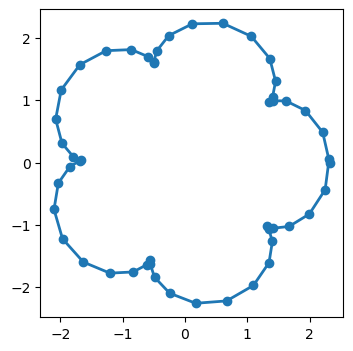

array([[ 2.32      ,  0.        ],
       [ 2.20982356,  0.48497018],
       [ 1.93293026,  0.83467531],
       [ 1.61987245,  0.9884703 ],
       [ 1.40431341,  0.99255016],
       [ 1.34773916,  0.97148332],
       [ 1.40549367,  1.05528373],
       [ 1.45343707,  1.30353144],
       [ 1.36004538,  1.66972743],
       [ 1.06292253,  2.02618378],
       [ 0.60618283,  2.23531912],
       [ 0.11741263,  2.22683408],
       [-0.26272018,  2.03689319],
       [-0.45821209,  1.78704284],
       [-0.4986467 ,  1.61486355],
       [-0.5000587 ,  1.5957995 ],
       [-0.59665985,  1.70062107],
       [-0.86229337,  1.8127063 ],
       [-1.2663233 ,  1.79530196],
       [-1.68908023,  1.57049652],
       [-1.98811148,  1.16497165],
       [-2.07758783,  0.69648911],
       [-1.97573306,  0.30877071],
       [-1.79332489,  0.09177599],
       [-1.66982592,  0.03268407],
       [-1.69348197,  0.02542204],
       [-1.85083943, -0.0667159 ],
       [-2.03439648, -0.33100879],
       [-2.10403717,

In [42]:
cl.hypotrochoid_example(numpts = 50, display = True)

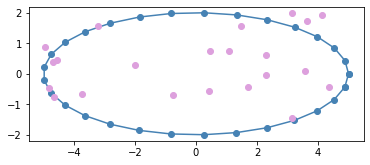

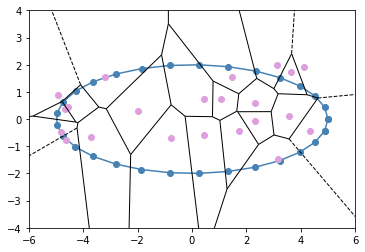

In [14]:

poissonpts = cl.make_poisson(inputt, .5, display = True);
plt.savefig('../shapes_medax/poisson1.png', 
                dpi = 300, pad_inches = 1)
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.plot(inputt[:,0], inputt[:,1], "-o", color = 'steelblue')
ax.plot([inputt[-1,0], inputt[0,0]],
        [inputt[-1,1], inputt[0,1]] , "-o", color = 'steelblue')
ax.plot(poissonpts[:,0], poissonpts[:,1], "o", color = 'plum')

vor = Voronoi(poissonpts)
fig2 = voronoi_plot_2d(vor, ax, show_vertices= False, 
                line_alpha = 1, show_points = False, 
                point_colors='orange', line_colors = 'black',
                point_size=10);

ax.set_xlim(-6,6)
ax.set_ylim(-4,4)

plt.savefig('../shapes_medax/poisson2.png', 
                dpi = 300, pad_inches = 1)
plt.show()

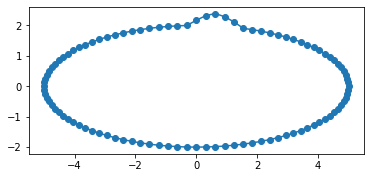

In [143]:
cl.bumped_ellipse_example(numpts = 100, display = True, 
                       bump = 0.7, k = .5, smooth = 1, 
                       leftpt = 0, rightpt = 1);

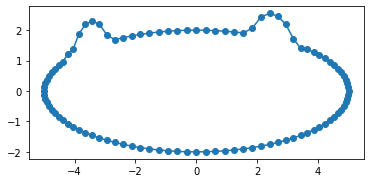

In [139]:


cl.more_bumps_ellipse_example(numpts = 100, display = True, 
                       bump = 1, k = 0.9, smooth = .8, 
                       bumpends = [[2,3], [-4, -3]]);

## EXAMPLES

## usage reminders

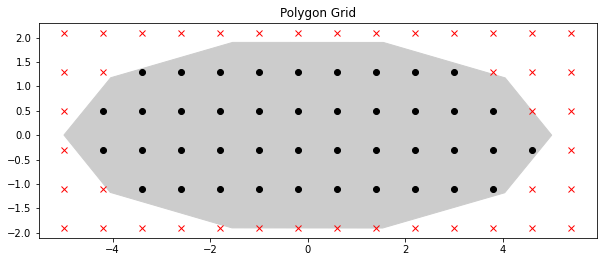

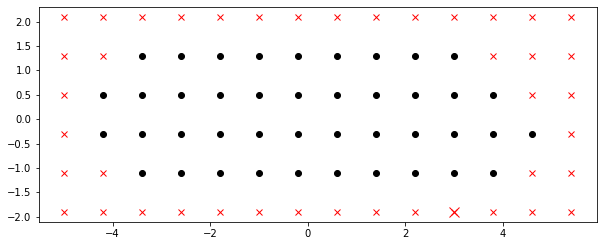

In [51]:
# usage reminders
points, inside, x_range, y_range = \
cl.polygon_grid(cl.ellipse_example(10), 0.8, plot = True);

cl.plot_nbrs(10, points, inside, x_range, y_range)
# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

# each row in neighbs is two special points to check knees between 
neighbs = cl.neighb_pairs(points, inside, x_range, y_range)

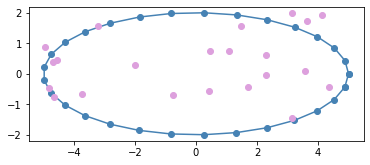

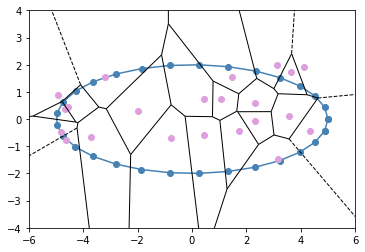

In [13]:

inputt = cl.ellipse_example(29, display = False);
poissonpts = cl.make_poisson(inputt, .5, display = True);
plt.savefig('../shapes_medax/poisson1.png', 
                dpi = 300, pad_inches = 1)
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.plot(inputt[:,0], inputt[:,1], "-o", color = 'steelblue')
ax.plot([inputt[-1,0], inputt[0,0]],
        [inputt[-1,1], inputt[0,1]] , "-o", color = 'steelblue')
ax.plot(poissonpts[:,0], poissonpts[:,1], "o", color = 'plum')

vor = Voronoi(poissonpts)
fig2 = voronoi_plot_2d(vor, ax, show_vertices= False, 
                line_alpha = 1, show_points = False, 
                point_colors='orange', line_colors = 'black',
                point_size=10);

ax.set_xlim(-6,6)
ax.set_ylim(-4,4)

plt.savefig('../shapes_medax/poisson2.png', 
                dpi = 300, pad_inches = 1)
plt.show()

## DEL AND VOR RESTRICTED TO INTERIOR

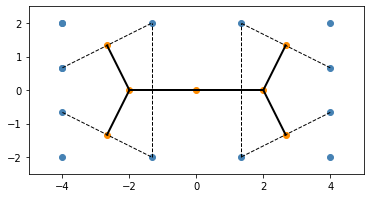

In [10]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

n = 12
inputt = cl.rectangle_example(numpts = n, display = False);
poissonpts = cl.make_poisson(inputt, .4, display = False);
# fake poiss points, to do approx ma
poissonpts = inputt


ax.plot(inputt[:,0], inputt[:,1], "o" ,color = 'steelblue')
ax.plot([inputt[-1,0], inputt[0,0]],
        [inputt[-1,1], inputt[0,1]] , "o", color = 'steelblue')
# only commentsed bc fake poisson
# ax.plot(poissonpts[:,0], poissonpts[:,1], "o", color = 'plum')

vor = Voronoi(poissonpts)
#plt.plot(vor.points[:,0], vor.points[:,1], 'o', color = 'black')
ax.set_xlim(-6,6)
ax.set_ylim(-4,4)
# VOR VERTS PLOT
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o', color = 'darkorange')

# Determine if each vor point is inside polygon
# note: inputt means ie ellipse
# ridgepts are the verts of vor edges
inside = mplPath(inputt).contains_points(vor.vertices)

ridge_vertices = np.array(vor.ridge_vertices)
# voronoi package indexes such that -1 doesn't mean last element, 
# it means element is inf
infis0 = ridge_vertices[:,0] >= 0
infis1 = ridge_vertices[:,1] >= 0
# t/f vectors that say if the point indexed by ids is in or out
pt0inside = inside[ridge_vertices[:,0]]
pt1inside = inside[ridge_vertices[:,1]]
# indices of vertices of lines we want
ids = ridge_vertices[infis0 & infis1 & pt0inside & pt1inside]
# these are the vertices of voronoi edges which are not infinite

# these are vor verts
verts_of_inside_vor_edges = vor.vertices[ids]

for i in range(len(verts_of_inside_vor_edges)):
    x0, y0 = verts_of_inside_vor_edges[i,0]
    x1, y1 = verts_of_inside_vor_edges[i,1]
    # VORONOI PLOT
    ax.plot([x0, x1], [y0,y1], color = 'black', linewidth = 2)

# ridge pts are input pts (poisson pt pr points)
# delaunay triangulation
ridge_points = np.array(vor.ridge_points)
ids2 = ridge_points[infis0 & infis1 & pt0inside & pt1inside]

del_edges_of_good_vor_edges = vor.points[ids2]

for i in range(len(del_edges_of_good_vor_edges)):
    x0, y0 = del_edges_of_good_vor_edges[i,0]
    x1, y1 = del_edges_of_good_vor_edges[i,1]
    ## DELAUNAY PLOT
    ax.plot([x0, x1], [y0,y1], '--', color = 'black', linewidth = 1)
ax.set_xlim(-5,5)
ax.set_ylim(-2.5,2.5)
# ax.plot()
plt.savefig('../shapes_medax/poisson3.png', 
                dpi = 300, pad_inches = 1)
plt.show()

## DEL AND VOR UNRESTRICTED?

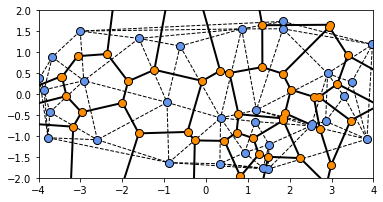

In [55]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
n = 50
# inputt = cl.ellipse_example(100, display = False);
inputt = cl.make_poisson(cl.rectangle_example(numpts=12, display=False), .9, display = False);
poissonpts = cl.make_poisson(inputt, .5, display = False);
# fake poiss points, to do approx ma
poissonpts = inputt


# ax.plot(inputt[:,0], inputt[:,1], "o" ,color = 'steelblue')
# ax.plot([inputt[-1,0], inputt[0,0]],
#         [inputt[-1,1], inputt[0,1]] , "o", color = 'steelblue')
# only commentsed bc fake poisson
# ax.plot(poissonpts[:,0], poissonpts[:,1], "o", color = 'plum')

vor = Voronoi(poissonpts)
#plt.plot(vor.points[:,0], vor.points[:,1], 'o', color = 'black')
ax.set_xlim(-6,6)
ax.set_ylim(-4,4)


# Determine if each vor point is inside polygon
# note: inputt means ie ellipse
# ridgepts are the verts of vor edges
inside = mplPath(inputt).contains_points(vor.vertices)

ridge_vertices = np.array(vor.ridge_vertices)
# voronoi package indexes such that -1 doesn't mean last element, 
# it means element is inf
infis0 = ridge_vertices[:,0] >= 0
# it means element is inf
#infis0 = np.logical_or(ridge_vertices[:,0] >= 0, ridge_vertices[:,0] < 0)
infis1 = ridge_vertices[:,1] >= 0
#infis1 = np.logical_or(ridge_vertices[:,1] >= 0, ridge_vertices[:,1] < 0)
# t/f vectors that say if the point indexed by ids is in or out
pt0inside = inside[ridge_vertices[:,0]]
pt0inside = np.logical_or(inside[ridge_vertices[:,0]], ~inside[ridge_vertices[:,0]])
pt1inside = inside[ridge_vertices[:,1]]
pt1inside = np.logical_or(inside[ridge_vertices[:,1]], ~inside[ridge_vertices[:,1]])
# indices of vertices of lines we want
ids = ridge_vertices[infis0 & infis1 & pt0inside & pt1inside]
# these are the vertices of voronoi edges which are not infinite

# these are vor verts
verts_of_inside_vor_edges = vor.vertices[ids]

for i in range(len(verts_of_inside_vor_edges)):
    x0, y0 = verts_of_inside_vor_edges[i,0]
    x1, y1 = verts_of_inside_vor_edges[i,1]
    # VORONOI PLOT
    ax.plot([x0, x1], [y0,y1], color = 'black', linewidth = 2)

# ridge pts are input pts (poisson pt pr points)
# delaunay triangulation
ridge_points = np.array(vor.ridge_points)
ids2 = ridge_points[infis0 & infis1 & pt0inside & pt1inside]
ids2 = ridge_points[pt0inside & pt1inside]

del_edges_of_good_vor_edges = vor.points[ids2]

for i in range(len(del_edges_of_good_vor_edges)):
    x0, y0 = del_edges_of_good_vor_edges[i,0]
    x1, y1 = del_edges_of_good_vor_edges[i,1]
    ## DELAUNAY PLOT
    ax.plot([x0, x1], [y0,y1], '--', color = 'black', linewidth = 1)
    
# VOR VERTS PLOT
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o', color = 'black', markersize = 8)

# VOR VERTS PLOT
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o', color = 'darkorange', markersize = 6)

# INPUT PTS PLOT
ax.plot(inputt[:,0], inputt[:,1], "o" , color = 'black', markersize = 8)
ax.plot(inputt[:,0], inputt[:,1], "o" , color = 'cornflowerblue', markersize = 6)

ax.set_xlim(-4,4)
ax.set_ylim(-2,2)
# ax.plot()
plt.savefig('../shapes_medax/poisson3.png', 
                dpi = 300, pad_inches = 1)
plt.show()

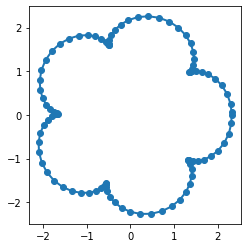

array([[ 2.32      ,  0.        ],
       [ 2.29211846,  0.24945119],
       [ 2.21194461,  0.48056203],
       [ 2.08939085,  0.67757448],
       [ 1.93938372,  0.82952176],
       [ 1.77971534,  0.93174453],
       [ 1.62848471,  0.98649539],
       [ 1.50149901,  1.00254425],
       [ 1.4100108 ,  0.99384215],
       [ 1.35911845,  0.97743707],
       [ 1.34706126,  0.97094354],
       [ 1.36551091,  0.98993251],
       [ 1.40081714,  1.04561937],
       [ 1.4360271 ,  1.14318487],
       [ 1.45338609,  1.2809722 ],
       [ 1.43695758,  1.45067651],
       [ 1.37498322,  1.63849982],
       [ 1.26164121,  1.82710417],
       [ 1.09794818,  1.99808078],
       [ 0.89167409,  2.134578  ],
       [ 0.65628199,  2.22370789],
       [ 0.40904596,  2.25838348],
       [ 0.16861916,  2.2383208 ],
       [-0.04759628,  2.17006096],
       [-0.22589725,  2.06600895],
       [-0.35819173,  1.94262857],
       [-0.44309831,  1.81805444],
       [-0.48607461,  1.70946685],
       [-0.4985561 ,

In [21]:
cl.hypotrochoid_example(numpts = 100, display = True)

### Zeroth Medial Ax

### First Medial Ax

## DEBUG LIST
- figure out if matrix[:][0] always has to be matrix[:,0] instead
- matrix.shape[1] is better than len(matrix[:][0])

from ondra: 
So arr[:][0] is kind of a pointless notation, because that is just arr[0]. You first do arr[:], which just returns the full array back to you, and then you take the first element of it -- that is, read it as (arr[:])[0]. Since number_of_cols = len(self.initmatrix[0]) is the right way to ask for number of columns (it's the length of the first row), your construction with the unnecessary [:] was also giving the correct result.

## -----------------------------------
# ask herbert

- eventually, instead of a uniform grid, should we use voronoi edges from a poisson point process to get rid of symmetry issues? 


## ------------------------------------
# add to manuscript
- sneaky trick in finding knees in 2D (that you compare way fewer things) 
- add figures of examples
- compare changes to epsilon, n, grid density
- comment that as n increases, so does epsilon
- try to explain why this med ax goes to edges instead of stopping at centers of curvature
- Stability: do a few experiments where ellipse gets bumps, and compare to vor med ax

## check 0 death / 1 birth switch

- if the simplex s in vin.matrixlist[0] that killed the empty set is much different than the one that killed the empty set in vin.matrixlist[1], then there is a dim 0 Type 3 Knee 
- this is easier to check than the next dimension of knee, because there's guaranteed to always be a simplex that kills the empty set if the complex isn't empty

# next: 
- pretty pictures. would be nice to visualize birth/death
- animations?! showing growth of complext for one point, and also for moving point around
- maths stuff: be able to tell if it's a type 3 knee
- make things faster: sparse matrix
- don't store things in duplicates
- later: refinement

# ToDo: 
- would be cool: replot the graph, but labeling mothers and murderers
- also cool: make graph into an animation that shows whole process
- separate voroni MA from example and add it as a graph option
- n4 -> n3 change to reduction 
- instead of separately finding zero cols and lowest ones, save them as we smart reduce
-----

- to sell the work better: start writing down all the problems we encountered to justify why we do things this way (try to remember why phat didn't work etc) 

# Triangles will cause issues: 
- currently, knee-finding relies on only having verts and edges

- in sublime, alt shift arrows to have cursors appear all the places
- ctrl shift arrows switchy switch
- ctrl shift p to find the things